In [1]:
import pystac

In [2]:
api_url = "https://earth-search.aws.element84.com/v1"

In [3]:
from pystac_client import Client

client = Client.open(api_url)

from shapely.geometry import Point
point = Point(27.95, 36.20)  # Coordinates of a point on Rhodes

In [4]:
collection_sentinel_2_l2a = "sentinel-2-l2a"  

search = client.search(
    collections=[collection_sentinel_2_l2a],
    intersects=point,
    datetime='2023-07-01/2023-08-31',
    query=['eo:cloud_cover<1']
)
print(search.matched())

11


In [5]:
items = search.item_collection()
items.save_object("rhodes_sentinel-2.json")

In [6]:
file_items = pystac.ItemCollection.from_file("rhodes_sentinel-2.json")

In [7]:
for item in file_items:
    print(item.id)
    print(item.datetime)

S2A_35SNA_20230827_0_L2A
2023-08-27 09:00:21.327000+00:00
S2B_35SNA_20230822_0_L2A
2023-08-22 09:00:20.047000+00:00
S2A_35SNA_20230817_0_L2A
2023-08-17 09:00:21.370000+00:00
S2B_35SNA_20230812_0_L2A
2023-08-12 09:00:21.069000+00:00
S2A_35SNA_20230807_0_L2A
2023-08-07 09:00:20.107000+00:00
S2B_35SNA_20230802_0_L2A
2023-08-02 09:00:20.321000+00:00
S2A_35SNA_20230728_0_L2A
2023-07-28 09:00:20.662000+00:00
S2B_35SNA_20230723_0_L2A
2023-07-23 09:00:21.476000+00:00
S2A_35SNA_20230718_0_L2A
2023-07-18 09:00:19.860000+00:00
S2B_35SNA_20230713_0_L2A
2023-07-13 09:00:20.114000+00:00
S2A_35SNA_20230708_0_L2A
2023-07-08 09:00:20.745000+00:00


In [8]:
print(file_items[-1])

<Item id=S2A_35SNA_20230708_0_L2A>


In [9]:
assets = file_items[-1].assets  # last item's asset dictionary
print(assets.keys())

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


In [10]:
red_href = assets["red"].href

In [11]:
red_href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/S/NA/2023/7/S2A_35SNA_20230708_0_L2A/B04.tif'

In [12]:
import rioxarray
red = rioxarray.open_rasterio(red_href)

In [13]:
print(red)

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 88kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
  * y            (y) float64 88kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


In [14]:
red.values

array([[[  0,   0,   0, ..., 253, 280, 256],
        [  0,   0,   0, ..., 217, 302, 263],
        [  0,   0,   0, ..., 280, 322, 301],
        ...,
        [  0,   0,   0, ..., 273, 352, 302],
        [  0,   0,   0, ..., 357, 374, 320],
        [  0,   0,   0, ..., 320, 452, 350]]], dtype=uint16)

In [15]:
print(red.rio.crs)
print(red.rio.nodata)
print(red.rio.bounds())
print(red.rio.width)
print(red.rio.height)

EPSG:32635
0
(499980.0, 3990240.0, 609780.0, 4100040.0)
10980
10980


In [16]:
print(red.rio.resolution())

(10.0, -10.0)


In [17]:
rhodes_red_80 = rioxarray.open_rasterio(red_href, overview_level=2)

In [18]:
print(rhodes_red_80)

<xarray.DataArray (band: 1, y: 1373, x: 1373)> Size: 4MB
[1885129 values with dtype=uint16]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 11kB 5e+05 5.001e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 11kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


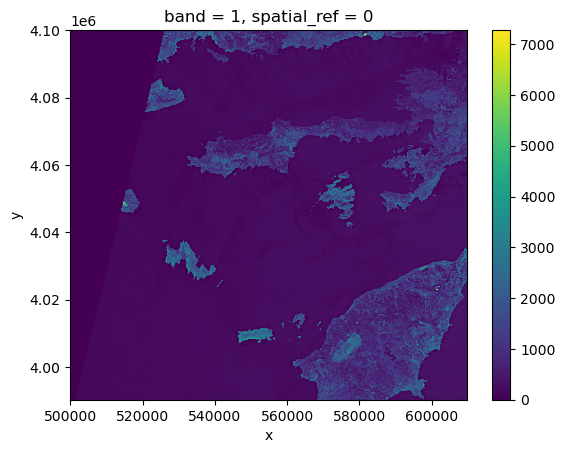

In [19]:
rhodes_red_80.plot()

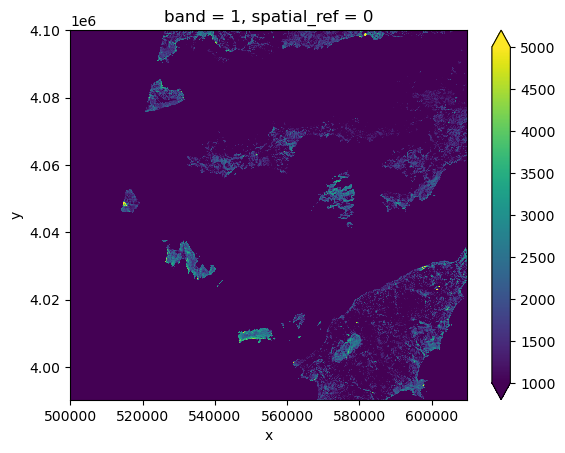

In [20]:
rhodes_red_80.plot(vmin=1000, vmax=5000)

## View Raster Coordinate Reference System (CRS) in Python

In [21]:
print(rhodes_red_80.rio.crs)

EPSG:32635


In [22]:
epsg_code = int(str(rhodes_red_80.rio.crs)[5:])

In [23]:
print(epsg_code)

32635


In [25]:
epsg = red.rio.crs.to_epsg()
epsg

32635

In [26]:
from pyproj import CRS
crs = CRS(epsg_code)
crs

<Projected CRS: EPSG:32635>
Name: WGS 84 / UTM zone 35N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Bulgaria. Central African Republic. Democratic Republic of the Congo (Zaire). Egypt. Estonia. Finland. Greece. Latvia. Lesotho. Libya. Lithuania. Moldova. Norway. Poland. Romania. Russian Federation. Sudan. Svalbard. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (24.0, 0.0, 30.0, 84.0)
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
crs.area_of_use

AreaOfUse(west=24.0, south=0.0, east=30.0, north=84.0, name='Between 24°E and 30°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Bulgaria. Central African Republic. Democratic Republic of the Congo (Zaire). Egypt. Estonia. Finland. Greece. Latvia. Lesotho. Libya. Lithuania. Moldova. Norway. Poland. Romania. Russian Federation. Sudan. Svalbard. Türkiye (Turkey). Uganda. Ukraine.')

In [28]:
print(rhodes_red_80.min())
print(rhodes_red_80.max())
print(rhodes_red_80.mean())
print(rhodes_red_80.std())

<xarray.DataArray ()> Size: 2B
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 2B
array(7277, dtype=uint16)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 8B
array(404.07532588)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 8B
array(527.5557502)
Coordinates:
    spatial_ref  int32 4B 0


In [29]:
print(rhodes_red_80.quantile([0.25, 0.75]))

<xarray.DataArray (quantile: 2)> Size: 16B
array([165., 315.])
Coordinates:
  * quantile  (quantile) float64 16B 0.25 0.75


In [30]:
import numpy
print(numpy.percentile(rhodes_red_80, 25))
print(numpy.percentile(rhodes_red_80, 75))

165.0
315.0


## Dealing with Missing Data

In [31]:
rhodes_red_80.rio.nodata

0

In [38]:
red_nodata = rioxarray.open_rasterio(red_href, masked=True, overview_level=2)

In [39]:
red_nodata

<xarray.DataArray (band: 1, y: 1373, x: 1373)> Size: 8MB
[1885129 values with dtype=float32]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 11kB 5e+05 5.001e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 11kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [41]:
temp = rhodes_red_80.where(rhodes_red_80 != rhodes_red_80.rio.nodata)

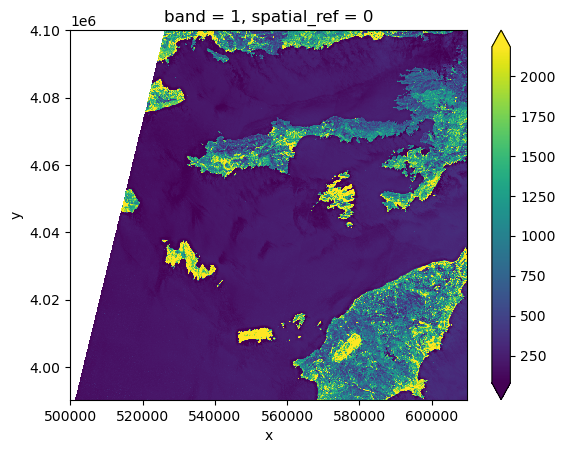

In [40]:
red_nodata.plot(robust=True)

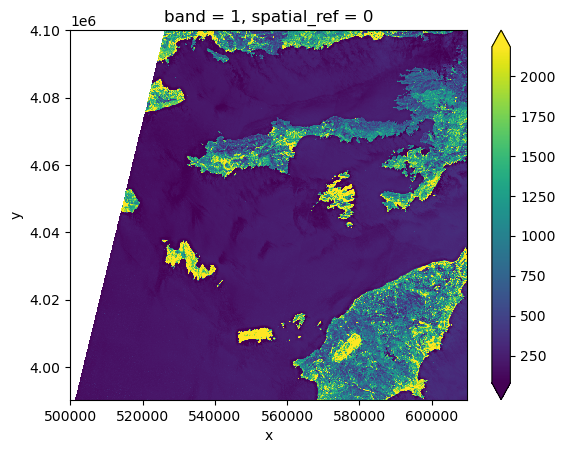

In [42]:
temp.plot(robust=True)

In [47]:
print(rhodes_red_80.min())
print(red_nodata.min())
print(rhodes_red_80.max())
print(red_nodata.max())
print(rhodes_red_80.mean())
print(red_nodata.mean())
print(rhodes_red_80.std())
print(red_nodata.std())

<xarray.DataArray ()> Size: 2B
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 4B
array(1., dtype=float32)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 2B
array(7277, dtype=uint16)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 4B
array(7277., dtype=float32)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 8B
array(404.07532588)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 4B
array(461.78833, dtype=float32)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 8B
array(527.5557502)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 4B
array(539.82855, dtype=float32)
Coordinates:
    spatial_ref  int32 4B 0


In [46]:
rhodes_red_80.min()

<xarray.DataArray ()> Size: 2B
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int32 4B 0

## Raster Bands

In [48]:
import pystac
items = pystac.ItemCollection.from_file('rhodes_sentinel-2.json')

In [49]:
rhodes_overview = rioxarray.open_rasterio(items[-1].assets['visual'].href, overview_level=2)

In [51]:
print(rhodes_overview)

<xarray.DataArray (band: 3, y: 1373, x: 1373)> Size: 6MB
[5655387 values with dtype=uint8]
Coordinates:
  * band         (band) int32 12B 1 2 3
  * x            (x) float64 11kB 5e+05 5.001e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 11kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


In [52]:
rhodes_overview.shape

(3, 1373, 1373)

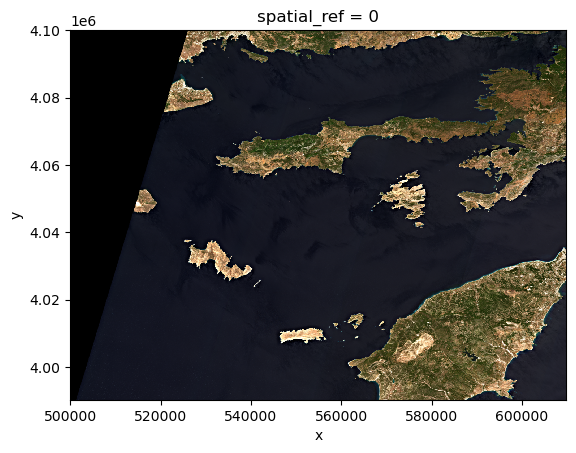

In [53]:
rhodes_overview.plot.imshow()

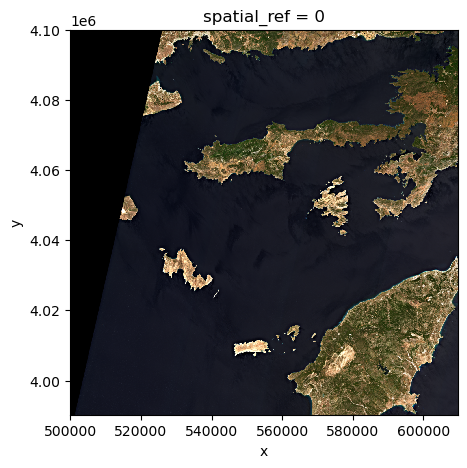

In [54]:
rhodes_overview.plot.imshow(size=5, aspect=1)